# Manual Linear regression
This is my approximation to Linear regression, this is how it works:<br />
Based on a dataset, we locate every sample as a point in the cartesian space.<br />
Then based on the relationship among all these points, we need to be able to identify a linear equation in the form:y=mx+b, talking about a bidimensional space.<br />
As we now, in order to create a line we need 2 points in the plance, then we we connect these 2 points and applying the previous function, we can obtain the required elements 'm' (inclination) and b (bias)<br />
The problem here is that we not only have 2 points but we can have as many as there are samples in a dataset.<br />
The reality is that if Lineal Regression was the proper tool for the prediction of a dataset, most points should show a high level of correlation hence if we connect every single pair of points we should be able to see that the majority of the lines are very similar in terms of inclination ad bias.<br />
Hence in order to create a single line that represents an approximation to the general behavior across the dataset, we are going to use the characteristics of every single line created from all point to point combinations.<br /> 
Total combinations = (n!/(r!*(n-r)!)) nChoose2<p />

The way i did it is simply by obteining the weighted average 'm' and 'b' across all lines, where the weight coeficients are given by the distances between the points<br />
This means that characteristics from lines created by points that are far from each other contribute more to the final 'm' and 'b' than lines created from points that are close to each other.<be > This is very important because helps to remove noise in the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt

In [2]:
class LinealRegression():
    import numpy as np
    import matplotlib.pyplot as plt
    import math as mt
    coeff=None
    inter=None
    x=[]
    y=[]

    def __init__(self,x,y):
        #For each pair of samples calculate their lineal equation in the form of y=mx+b
        #also calculate the distance between the 2 points; A total of nC2 combinations
        index=0
        dist={}
        m={}
        b={}
        for i in range(0,len(x)-1):
            for j in range(i,len(x)):
                cbn=((y[j]*x[i])-(y[i]*x[j]))
                cbd=(x[i]-x[j])
                if cbd!=0: #If the result is 0 the line is discarted because it would be completely vertical
                    cb=cbn/cbd
                    if x[i]!=0: #if result is 0 we descart it we dont care a bout those
                        cm=(y[i]-cb)/x[i]
                        index+=1
                        #Distance
                        d=mt.sqrt(mt.pow(abs(x[j]-x[i]),2)+mt.pow(abs(y[j]-y[i]),2))
                        m[index]=cm
                        b[index]=cb
                        dist[index]=d
        #Now get an average weighted value for both the linear coeficient and the intercepttion 
        #where the distance between the points is the weight
        m=np.array(list(m.values()))
        dist=np.array(list(dist.values()))
        dist2=dist*dist #for quadratic weight
        b=np.array(list(b.values()))
        #Calculate weighted average
        self.coeff=np.sum(m*dist)/np.sum(dist)
        self.inter=np.sum(b*dist)/np.sum(dist)
        self.x=x;self.y=y;
        
    def plot(self):
        plt.figure(figsize=(16,10))
        plt.scatter(x=self.x,y=self.y)
        x_min=self.x.min();x_max=self.x.max();
        x_plot=np.array(np.linspace(x_min,x_max,10))
        y_plot=(x_plot * self.coeff) + self.inter
        plt.plot(x_plot,y_plot,'r')
        plt.show()
        

In [3]:
x=10*np.random.rand(100)
y=(4*x)+3*np.random.rand(100)
LR=LinealRegression(x=x,y=y)

In [4]:
print('Linear Equation Coeficient: %f\n\rLinear Equation Interception: %f'%(LR.coeff,LR.inter))

Linear Equation Coeficient: 4.099383
Linear Equation Interception: 0.904972


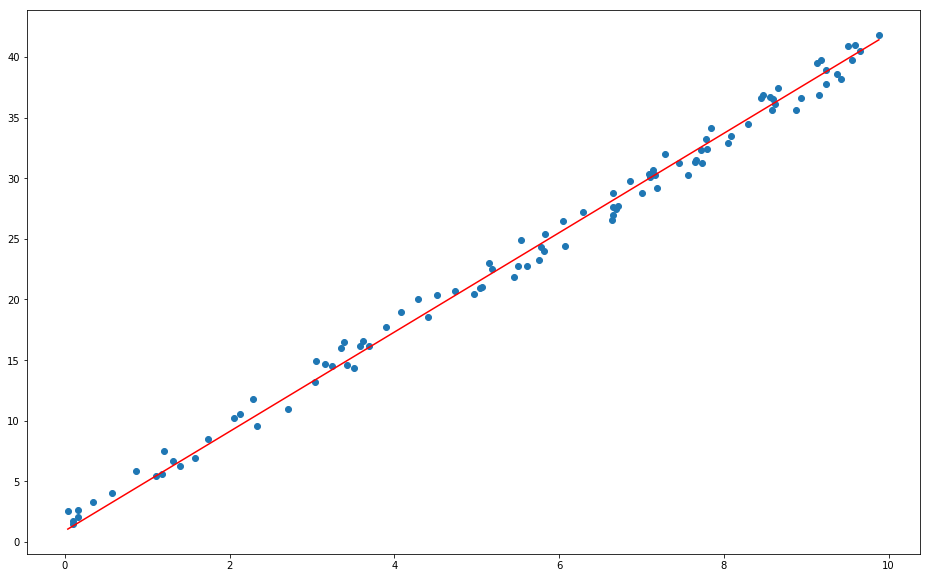

In [5]:
LR.plot()